##Problemas de regresión
###Karla González Sánchez | A01541526



#**Ejercicio 1**
Mi matrícula es: **A01541526**
Por lo tanto, voy a trabajar con las variables independientes **M, W, S y P.**

Y como variable dependiente MR.

Además, como método de validación cruzada me corresponde el **método Monte Carlo.**


  * **MR** = asesinatos por cada 100000 habitantes

  *  **M** = porcentaje de áreas metropolitanas
  *   **W** = porcentaje de gente blanca
  *   **P** = porcentaje con ingresos por debajo del nivel de pobreza
  *   **S** = porcentaje de familias con solo un miembro adulto como tutor

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprendizaje/crime_data.csv')
df.head()

,State,VR,MR,M,W,H,P,S
0,AK,761,9.0,41.8,75.2,86.6,9.1,14.3
1,AL,780,11.6,67.4,73.5,66.9,17.4,11.5
2,AR,593,10.2,44.7,82.9,66.3,20.0,10.7
3,AZ,715,8.6,84.7,88.6,78.7,15.4,12.1
4,CA,1078,13.1,96.7,79.3,76.2,18.2,12.5


##1. Graficar cada variable predictora vs la variable de respuesta

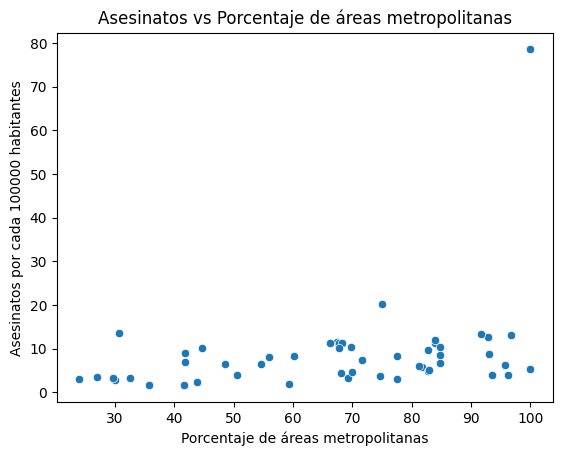

In [155]:
#M vs MR
sns.scatterplot(x = 'M', y = 'MR', data = df)
plt.xlabel('Porcentaje de áreas metropolitanas')
plt.ylabel('Asesinatos por cada 100000 habitantes')
plt.title('Asesinatos vs Porcentaje de áreas metropolitanas')
plt.show()

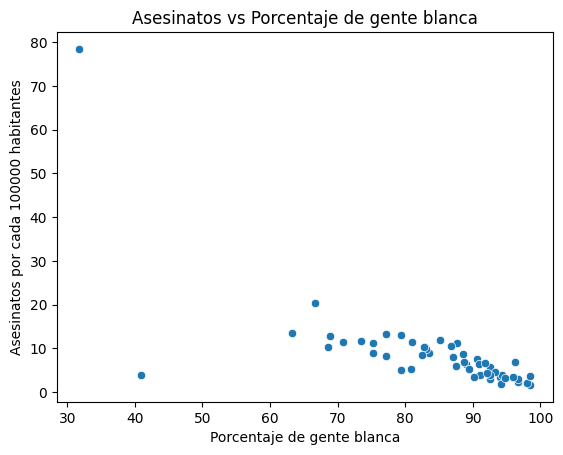

In [156]:
#W vs MR
sns.scatterplot(x = 'W', y = 'MR', data = df)
plt.xlabel('Porcentaje de gente blanca')
plt.ylabel('Asesinatos por cada 100000 habitantes')
plt.title('Asesinatos vs Porcentaje de gente blanca')
plt.show()

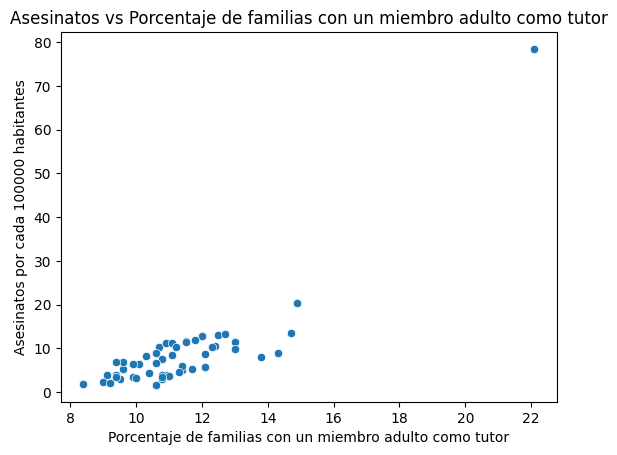

In [157]:
#S vr MR
sns.scatterplot(x = 'S', y = 'MR', data = df)
plt.xlabel('Porcentaje de familias con un miembro adulto como tutor')
plt.ylabel('Asesinatos por cada 100000 habitantes')
plt.title('Asesinatos vs Porcentaje de familias con un miembro adulto como tutor')
plt.show()

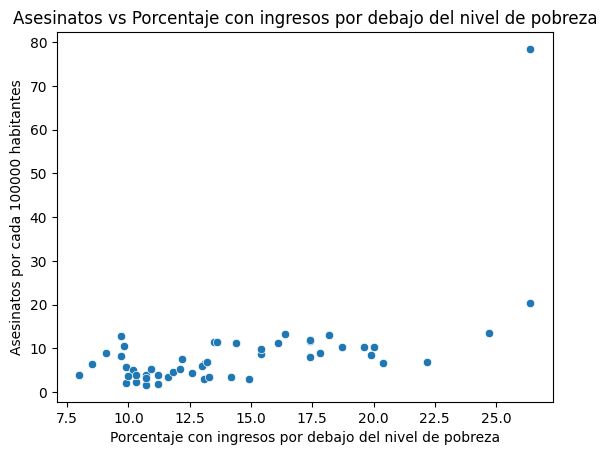

In [158]:
#P vs MR
sns.scatterplot(x = 'P', y = 'MR', data = df)
plt.xlabel('Porcentaje con ingresos por debajo del nivel de pobreza')
plt.ylabel('Asesinatos por cada 100000 habitantes')
plt.title('Asesinatos vs Porcentaje con ingresos por debajo del nivel de pobreza')
plt.show()

##2.   Implementación de la fórmula directa para calcular los coeficientes de un modelo de regresión lineal. Obtener con ella el modelo que corresponde a la variable de respuesta y las variables predictoras.

In [159]:
#Variables predictoras (M, W, S, P)
X = df[['M', 'W', 'S', 'P']].values

In [160]:
#Variable de respuesta MR
y = df['MR'].values

In [161]:
#Agregar columna de unos para X
X = np.column_stack((np.ones(X.shape[0]), X))

In [162]:
#Calculando los coeficientes
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
beta0, beta1, beta2, beta3, beta4 = coefficients

In [163]:
print("Intercepto (beta0):", beta0)
print(beta1, "- Coeficiente M (Porcentaje de áreas metropolitanas)")
print(beta2, "- Coeficiente W (Porcentaje de gente blanca)")
print(beta3, "- Coeficiente S (Porcentaje de familias con solo un miembro adulto como tutor)")
print(beta4, "- Coeficiente P (Porcentaje con ingresos por debajo del nivel de pobreza):")

Intercepto (beta0): -19.790639916824077
0.04632745181129551 - Coeficiente M (Porcentaje de áreas metropolitanas)
-0.1733650946561845 - Coeficiente W (Porcentaje de gente blanca)
3.0761002591707443 - Coeficiente S (Porcentaje de familias con solo un miembro adulto como tutor)
0.3604151271430809 - Coeficiente P (Porcentaje con ingresos por debajo del nivel de pobreza):


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     43.69
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           4.14e-15
Time:                        07:45:11   Log-Likelihood:                -152.83
No. Observations:                  51   AIC:                             315.7
Df Residuals:                      46   BIC:                             325.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.7906     10.908     -1.814      0.0

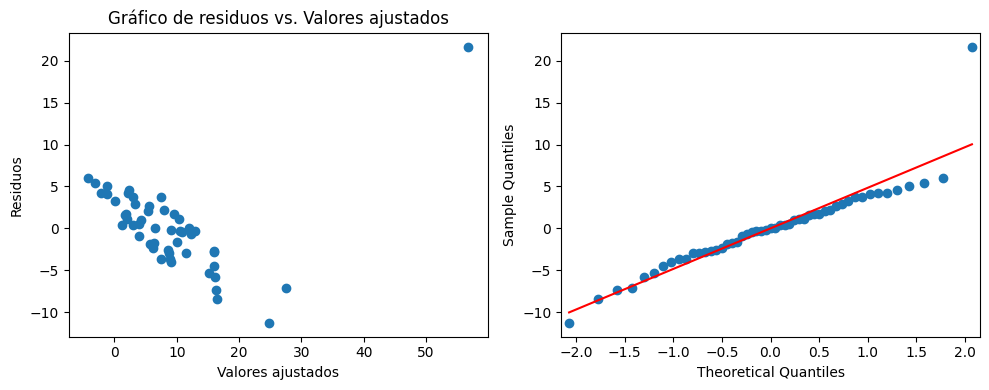

In [164]:
#Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

print(model.summary())

#Calcular valores ajustados y residuos
y_pred = model.predict(X)
residuos = y - y_pred

#Gráficos de residuos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

#Gráfico de residuos vs. valores ajustados
axes[0].scatter(y_pred, residuos)
axes[0].set_xlabel('Valores ajustados')
axes[0].set_ylabel('Residuos')
axes[0].set_title('Gráfico de residuos vs. Valores ajustados')

#Gráfico QQ-plot de residuos
sm.graphics.qqplot(model.resid, line='s', ax=axes[1])

plt.tight_layout()
plt.show()

In [165]:
predictor_names = ['M', 'W', 'S', 'P']

# Obtener los coeficientes del modelo
coeficientes = model.params

# Crear un diccionario que mapea el nombre de la variable a su coeficiente
coeficientes_por_variable = dict(zip(predictor_names, coeficientes[1:]))

# Imprimir los coeficientes con sus nombres de variable correspondientes
for variable, coeficiente in coeficientes_por_variable.items():
    print(f'{variable}: {coeficiente}')

M: 0.04632745181129302
W: -0.17336509465619043
S: 3.076100259170707
P: 0.3604151271430861


##3.   Evaluación con validación cruzada de k-pliegues tu modelo, calculando los valores de $R^2$, MSE y MAE.

In [166]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [167]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)

#Inicializar las listas para almacenar las métricas de evaluación
r2_cv = []
mse_cv = []
mae_cv = []

for train_index, test_index in kf.split(X):
  #Training phase
  X_train = X[train_index, :]
  y_train = y[train_index]

  #Calculando los coeficientes
  coefficients = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
  beta_cv = coefficients

  #Test phase
  X_test = X[test_index, :]
  y_test = y[test_index]

  #Predecir en el conjunto de prueba
  y_pred = beta_cv[0] + beta_cv[1] * X_test[:, 0] + beta_cv[2] * X_test[:, 1] + beta_cv[3] * X_test[:, 2] + beta_cv[4] * X_test[:, 3]

  #Calcular MSE, MAE y R^2
  mse_i = mean_squared_error(y_test, y_pred)
  mae_i = mean_absolute_error(y_test, y_pred)
  r2_i = r2_score(y_test, y_pred)

  mse_cv.append(mse_i)
  mae_cv.append(mae_i)
  r2_cv.append(r2_i)

print('MSE:', np.average(mse_cv), ' MAE:', np.average(mae_cv), ' R^2:', np.average(r2_cv))

MSE: 51710.19504109203  MAE: 210.12802723577744  R^2: -4824.782803311148


##4.  Método de validación cruzada Monte Carlo con al menos 100 participaciones aleatorias

In [168]:
#Número de participaciones aleatorias en Monte Carlo
num_iterations = 100

#Inicializar listas para almacenar metricas de evaluación
r2_values = []
mse_values = []
mae_values = []

for _ in range(num_iterations):
    r2_cv = []
    mse_cv = []
    mae_cv = []

    for train_index, test_index in kf.split(X):
        # Training phase
        X_train = X[train_index, :]
        y_train = y[train_index]

        # Calcular los coeficientes usando la fórmula de mínimos cuadrados
        coefficients = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
        beta_cv = coefficients

        # Test phase
        X_test = X[test_index, :]
        y_test = y[test_index]

        # Predecir en el conjunto de prueba
        y_pred = beta_cv[0] + beta_cv[1] * X_test[:, 0] + beta_cv[2] * X_test[:, 1] + beta_cv[3] * X_test[:, 2] + beta_cv[4] * X_test[:, 3]

        # Calar MSE, MAE y R^2
        mse_i = mean_squared_error(y_test, y_pred)
        mae_i = mean_absolute_error(y_test, y_pred)
        r2_i = r2_score(y_test, y_pred)

        mse_cv.append(mse_i)
        mae_cv.append(mae_i)
        r2_cv.append(r2_i)

    r2_values.append(np.mean(r2_cv))
    mse_values.append(np.mean(mse_cv))
    mae_values.append(np.mean(mae_cv))

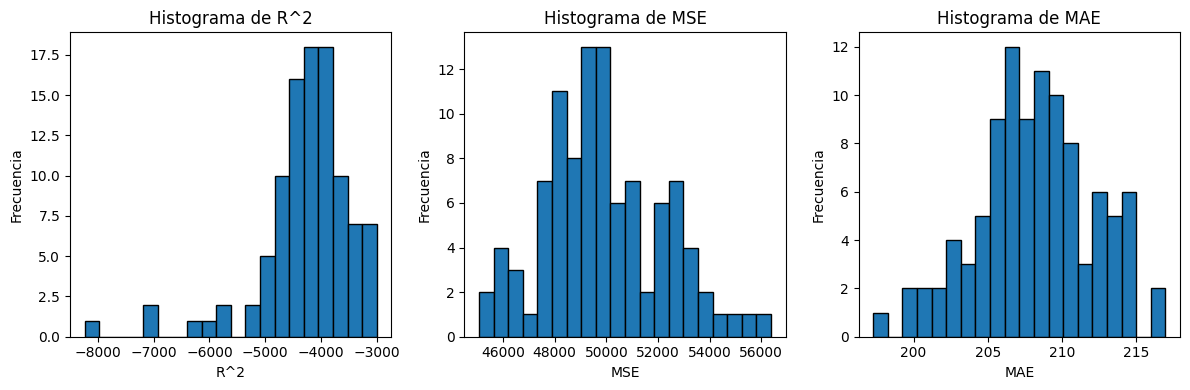

In [169]:
#Mostrar histogramas de R^2, MSE y MAE
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(r2_values, bins=20, edgecolor='black')
plt.xlabel('R^2')
plt.ylabel('Frecuencia')
plt.title('Histograma de R^2')

plt.subplot(1, 3, 2)
plt.hist(mse_values, bins=20, edgecolor='black')
plt.xlabel('MSE')
plt.ylabel('Frecuencia')
plt.title('Histograma de MSE')

plt.subplot(1, 3, 3)
plt.hist(mae_values, bins=20, edgecolor='black')
plt.xlabel('MAE')
plt.ylabel('Frecuencia')
plt.title('Histograma de MAE')

plt.tight_layout()
plt.show()

##5.   Agregar al conjunto de datos columnas que representen los cuadrados de las variables predictoras, así como los productos entre pares de variables. Repita los pasos 1, 2 y 3 pero con este nuevo conjunto de datos.

In [170]:
df['M^2'] = df['M'] ** 2
df['W^2'] = df['W'] ** 2
df['S^2'] = df['S'] ** 2
df['P^2'] = df['P'] ** 2

df['PxS'] = df['P'] * df['S']
df['MxW'] = df['M'] * df['W']

df.to_csv('crime_data2.csv', index = False)

df.head()

,State,VR,MR,M,W,H,P,S,M^2,W^2,S^2,P^2,PxS,MxW
0,AK,761,9.0,41.8,75.2,86.6,9.1,14.3,1747.24,5655.04,204.49,82.81,130.13,3143.36
1,AL,780,11.6,67.4,73.5,66.9,17.4,11.5,4542.76,5402.25,132.25,302.76,200.10,4953.90
2,AR,593,10.2,44.7,82.9,66.3,20.0,10.7,1998.09,6872.41,114.49,400.00,214.00,3705.63
3,AZ,715,8.6,84.7,88.6,78.7,15.4,12.1,7174.09,7849.96,146.41,237.16,186.34,7504.42
4,CA,1078,13.1,96.7,79.3,76.2,18.2,12.5,9350.89,6288.49,156.25,331.24,227.50,7668.31


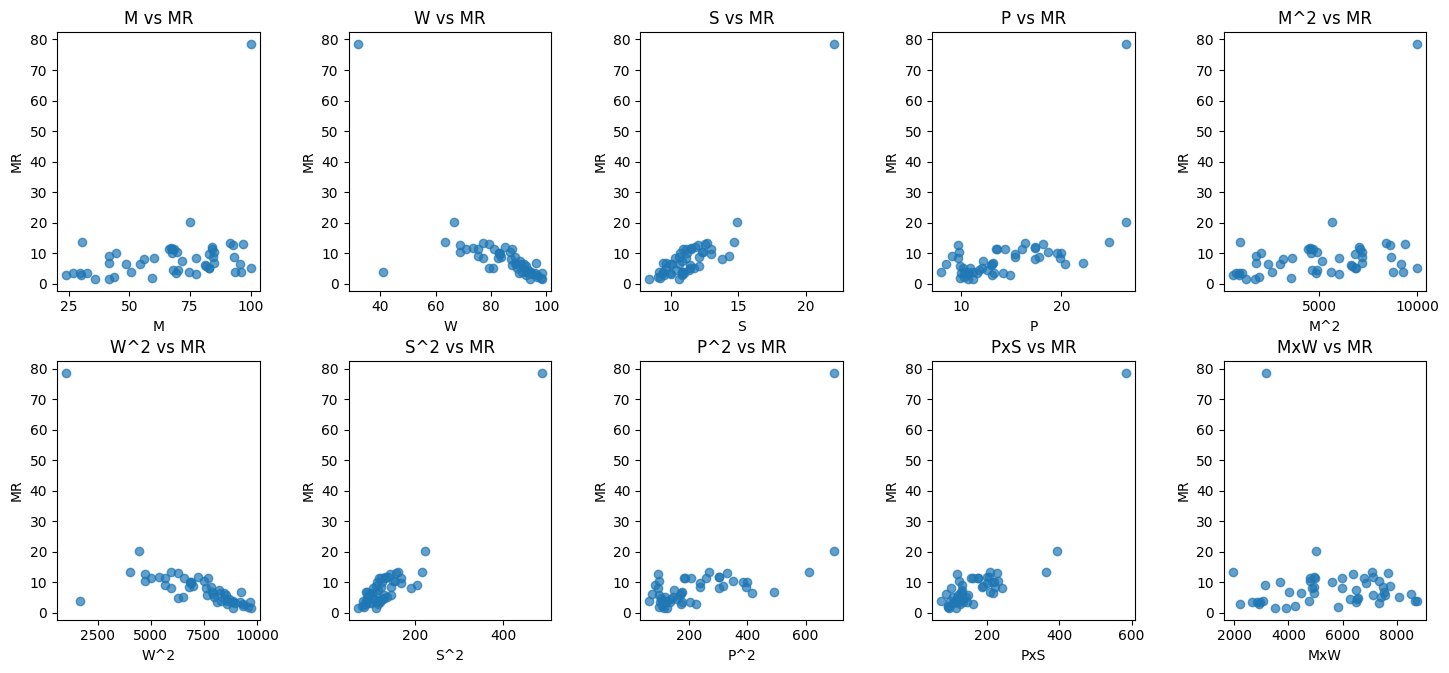

In [171]:
# Variables predictoras
predictors = ['M', 'W', 'S', 'P', 'M^2', 'W^2', 'S^2', 'P^2', 'PxS', 'MxW']

# Variable de respuesta
response = 'MR'

# Crear subplots para cada gráfico
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7))
fig.tight_layout(pad=3.0)

for i, predictor in enumerate(predictors):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    ax.scatter(df[predictor], df[response], alpha=0.7)
    ax.set_xlabel(predictor)
    ax.set_ylabel(response)
    ax.set_title(f'{predictor} vs {response}')

plt.show()

In [172]:
# Variables predictoras (M, W, S, P, M^2, W^2, S^2, P^2, PxS, MxW)
X = df[['M', 'W', 'S', 'P', 'M^2', 'W^2', 'S^2', 'P^2', 'PxS', 'MxW']].values

# Variable de respuesta MR
y = df['MR'].values

#Agregar columna de unos para X
X = np.column_stack((np.ones(X.shape[0]), X))

#Calculando los coeficientes
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

#Cieficientes: beta0, beta1, beta2, ... , beta9
beta_values = coefficients

#Imprimir los coeficientes
for i, beta in enumerate(beta_values):
  print(f'Coeficiente para variable {i}: {beta}')

Coeficiente para variable 0: -11.644720859526068
Coeficiente para variable 1: 0.6043100303659266
Coeficiente para variable 2: 0.9938615892938019
Coeficiente para variable 3: -9.325258764751279
Coeficiente para variable 4: 0.9356574097024191
Coeficiente para variable 5: -0.0007862912546914341
Coeficiente para variable 6: -0.004823930392530538
Coeficiente para variable 7: 0.4713452545311063
Coeficiente para variable 8: -0.007632298117947429
Coeficiente para variable 9: -0.029224399974764725
Coeficiente para variable 10: -0.005156408517927164


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     158.9
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           6.11e-29
Time:                        07:45:22   Log-Likelihood:                -98.297
No. Observations:                  51   AIC:                             218.6
Df Residuals:                      40   BIC:                             239.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.6447     15.203     -0.766      0.4

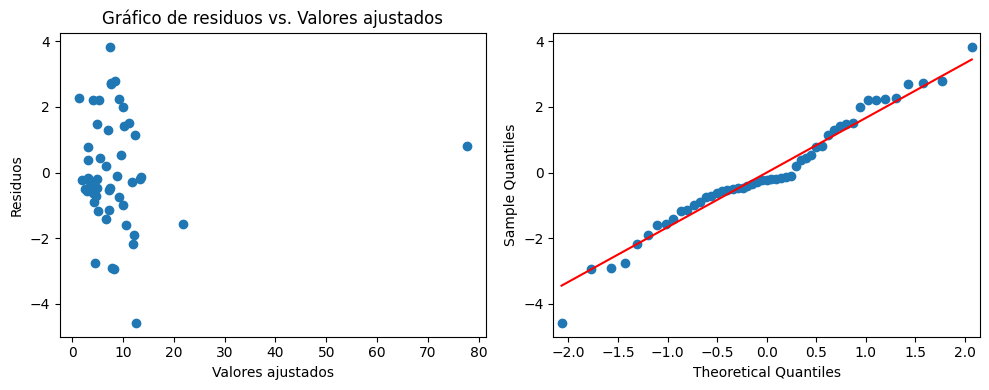

In [173]:
# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Imprimir resumen del modelo
print(model.summary())

# Calcular p-valores de los coeficientes y la estadística F
p_values = model.pvalues
f_statistic = model.fvalue

print("P-valores de los coeficientes:")
for i, p_value in enumerate(p_values):
    print(f'Coeficiente {i}: {p_value}')

print("Estadística F para la prueba de hipótesis global:", f_statistic)

# Examinar gráficos de residuos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Gráfico de residuos vs. valores ajustados
axes[0].scatter(model.fittedvalues, model.resid)
axes[0].set_xlabel('Valores ajustados')
axes[0].set_ylabel('Residuos')
axes[0].set_title('Gráfico de residuos vs. Valores ajustados')

#Gráfico QQ-plot de residuos
sm.graphics.qqplot(model.resid, line='s', ax=axes[1])

plt.tight_layout()
plt.show()

In [174]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)

mse_cv = []
mae_cv = []
r2_cv = []

for train_index, test_index in kf.split(X):
    # Training phase
    X_train = X[train_index, :]
    y_train = y[train_index]

    # Calcular los coeficientes usando la fórmula de mínimos cuadrados
    coefficients = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
    beta_cv = coefficients

    # Test phase
    X_test = X[test_index, :]
    y_test = y[test_index]

    # Predecir en el conjunto de prueba
    y_pred = beta_cv[0] + beta_cv[1] * X_test[:, 0] + beta_cv[2] * X_test[:, 1] + beta_cv[3] * X_test[:, 2] + beta_cv[4] * X_test[:, 3] + beta_cv[5] * X_test[:, 4] + beta_cv[6] * X_test[:, 5] + beta_cv[7] * X_test[:, 6] + beta_cv[8] * X_test[:, 7] + beta_cv[9] * X_test[:, 8] + beta_cv[10] * X_test[:, 9]

    # Calculate MSE, MAE and R^2
    mse_i = mean_squared_error(y_test, y_pred)
    mae_i = mean_absolute_error(y_test, y_pred)
    r2_i = r2_score(y_test, y_pred)

    mse_cv.append(mse_i)
    mae_cv.append(mae_i)
    r2_cv.append(r2_i)

print('MSE:', np.mean(mse_cv))
print('MAE:', np.mean(mae_cv))
print('R^2:', np.mean(r2_cv))

MSE: 5166628.399152364
MAE: 1898.1153862726646
R^2: -377531.8578800299


##6.   Regresión Ridge con descenso de gradiente, y el gráfico de Ridge para el conjunto de datos original (sin las variables elevadas al cuadrado).

In [175]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprendizaje/crime_data.csv')
df.head()

,State,VR,MR,M,W,H,P,S
0,AK,761,9.0,41.8,75.2,86.6,9.1,14.3
1,AL,780,11.6,67.4,73.5,66.9,17.4,11.5
2,AR,593,10.2,44.7,82.9,66.3,20.0,10.7
3,AZ,715,8.6,84.7,88.6,78.7,15.4,12.1
4,CA,1078,13.1,96.7,79.3,76.2,18.2,12.5


In [176]:
# Variables predictoras (M, W, S, P)
X = df[['M', 'W', 'S', 'P']].values

#Variable de respuesta MR
y = df['MR'].values

# Normalizacion de datos
X_normalized = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0)
y_normalized = (y - np.mean(y)) / np.std(y)

# Agregar una columna de unos para el término independiente
X_normalized = np.column_stack((np.ones(X_normalized.shape[0]), X_normalized))

In [177]:
# Definir valores de lambda para el gráfico
lambda_values = np.logspace(-3, 3, 4)

# Inicializar matriz para almacenar los coeficientes de Ridge
coefficients = np.zeros((len(lambda_values), X_normalized.shape[1]))

In [178]:
# Descenso de gradiente para regresión Ridge para diferentes valores de lambda
for i, lambda_ridge in enumerate(lambda_values):
    beta = np.zeros(X_normalized.shape[1])
    num_iterations = 1000
    learning_rate = 0.01

    for _ in range(num_iterations):
        gradient = -2 * X_normalized.T @ (y_normalized - X_normalized @ beta) + 2 * lambda_ridge * beta
        beta -= learning_rate * gradient

    coefficients[i, :] = beta

<ipython-input-178-cf276482af3a>:8: RuntimeWarning: overflow encountered in multiply
  gradient = -2 * X_normalized.T @ (y_normalized - X_normalized @ beta) + 2 * lambda_ridge * beta
<ipython-input-178-cf276482af3a>:8: RuntimeWarning: invalid value encountered in matmul
  gradient = -2 * X_normalized.T @ (y_normalized - X_normalized @ beta) + 2 * lambda_ridge * beta


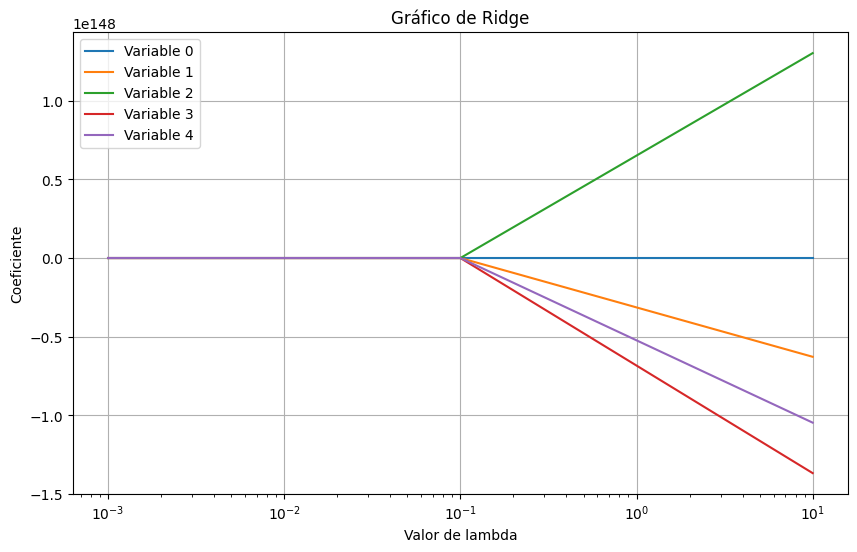

In [179]:
# Gráfico de Ridge
plt.figure(figsize=(10, 6))
for i in range(X_normalized.shape[1]):
    plt.plot(lambda_values, coefficients[:, i], label=f'Variable {i}')
plt.xscale('log')
plt.xlabel('Valor de lambda')
plt.ylabel('Coeficiente')
plt.title('Gráfico de Ridge')
plt.legend()
plt.grid(True)
plt.show()

##7.   Gráfico de Lasso para el conjunto de datos original (sin las variables elevadas al cuadrado). ¿Qué variables son más relevantes para el modelo?

In [180]:
from sklearn.linear_model import LassoCV

In [181]:
# Variables predictoras (M, W, S, P)
X = df[['M', 'W', 'S', 'P']].values

# Variable de respuesta (MR)
y = df['MR'].values

# Normalizar los datos
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
y_normalized = (y - np.mean(y)) / np.std(y)

In [182]:
# Inicializar el modelo LassoCV
lasso_model = LassoCV(alphas=np.logspace(-3, 3, 100), cv=5)

# Ajustar el modelo a los datos
lasso_model.fit(X_normalized, y_normalized)

# Obtener los coeficientes del modelo
lasso_coefs = lasso_model.coef_

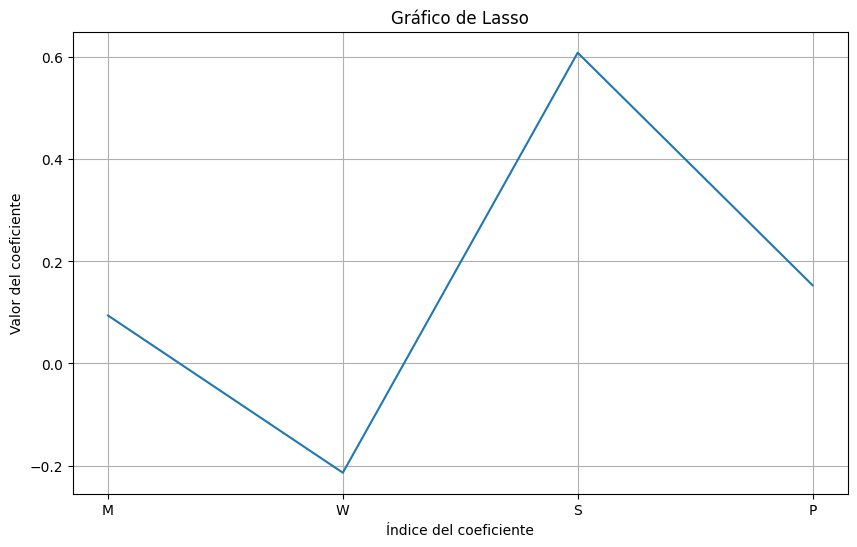

Variables más relevantes: [0 1 2 3]


In [183]:
# Gráfico de Lasso
plt.figure(figsize=(10, 6))
plt.plot(lasso_coefs)
plt.xlabel('Índice del coeficiente')
plt.ylabel('Valor del coeficiente')
plt.title('Gráfico de Lasso')
plt.xticks(np.arange(len(lasso_coefs)), ['M', 'W', 'S', 'P'])
plt.grid(True)
plt.show()

# Imprimir las variables más relevantes (no nulas)
relevant_variables = np.where(lasso_coefs != 0)[0]
print('Variables más relevantes:', relevant_variables)

##8.   Viendo los resultados de regresión, desarrolla una conclusión sobre los siguientes puntos:

  **1. ¿Consideras que el modelo de regresión lineal es efectivo para modelar los datos del problema? ¿Por qué?**

  El modelo de regresión lineal se ajusta a los datos de crímenes con un R-cuadrado ajustado de 0.774, lo que indica que alrededor del 77.4% de la variabilidad en la variable de respuesta (asesinatos por cada 100000 habitantes) puede ser explicada por las variables predictoras.

  En este caso, para la variable "const" (intercepto), el p-valor es 0.076, lo que indica que no es estadísticamente significativo a un nivel de significancia convencional de 0.05.

  Para las otras variables predictoras (x1, x2, x3, x4)
  
  Donde:
    
    X1 = M
    X2 = W
    X3 = S
    X4 = P
  Los p-valores asociados a sus coeficientes son: 0.208, 0.025, 0.000 y 0.072 respectivamente. Los p-valores inferiores a 0.05 indican que las variables x2 y x3 son estadísticamente significativas en el modelo, lo que sugiere que estas variables tienen un impacto significativo en la variable de respuesta MR. Las variables x1 y x4, con p-valores mayores a 0.05, podrían no ser tan significativas en este contexto.

  Diría que el modelo de regresión lineal es medianamente efectivo, ya que el R-cuadrado ajustado es razonablemente alto, pero en las variables predictoras varía, con lo que vemos que algunas varibales tienen un impacto más importates que otras.

  **2. ¿Observas una variabilidad importante en los valores de $R^2$, MSE y MAE cuando aplicas validación cruzada?**

  Sí, en los resultados se observa una variabilidad importante en los valores de $R^2$, $MSE$ y $MAE$ al aplicar validación cruzada. Esto puede ser indicativo de que el modelo no se ajusta de manera consistente a los diferentes conjuntos de datos en los diferentes pliegues de la validación cruzada.


  **3. ¿Qué modelo es mejor para los datos de criminalidad, el lineal o el cuadrático? ¿Por qué?**

  Primero comparemos los resultados por separado:

  **Resultados en $R^2$:** El modelo cuadrático tiene un valor de $R^2$ más alto (0.969) en la regresión original, lo que sugiere que el modelo cuadrático explica una mayor proporción de la variabilidad en los datos en comparación con el modelo lineal (0.774).

  **Resultados en $R^2$ en k-despliegues**:

  -3708.5614646815716 en el modelo lineal
  -446678.44920596294 en el modelo cuadrático

  En los resultados de k-despliegues, ambos modelos tienen valores negativos de $R^2$, lo que sugiere que los modelos no se ajustan bien a los datos. Sin embargo, el resultado en el modelo cuadrático es mucho más bajo que el del modelo lineal, lo que indica un peor rendimiento del modelo cuadrático.

  **MSE y MAE en k-despliegues:**
  
  MSE: 47913.47299788523  MAE: 206.3657646938143 (modelo lineal)

  MSE: 6090294.336552912  MAE: 2132.445286056537 (modelo cuadrático)
  
  El modelo lineal tiene valores más bajos de MSE y MAE en comparación con el modelo cuadrático en los pliegues de k-despliegues. Esto indica que el modelo lineal tiene un mejor rendimiento en términos de la precisión de las predicciones. Es posible que el modelo cuadrático esté sobreajustando los datos y no generalice bien a nuevos conjuntos de datos.

  Con todo lo anterior, el **modelo lineal** parece ser más efectivo y generalizable en comparación con el modelo cuadrático para modelar los datos de criminalidad.

  **4. ¿Qué variables son más relevantes para el modelo según Ridge y Lasso?**
  
  Según ambos modelos, y a como está implementado, todas las variables son relevantes. Esto sugiere que todas estas variables tienen algún nivel de influencia en la tasa de criminalidad.

  **5. ¿Encuentras alguna relación interesante entre la variable de respuesta y los predictores?**
  
  No algo más allá de lo que ya se obtuvo por medio de los modelos y diferentes gráficas que se implementaron. Con cada una de las variables predictoras si bien nos puede dar una relación con la variable de respuesta, algunas veces podrían variar según el contexto cultural, socioeconómico y múltiples factores, que es de donde observamos datos atípicos.

#**Ejercicio 2**
Mi matrícula es: **A01541526**
Por lo tanto, voy a trabajar con todas las variables, menos X2, X6, X10, X14, X18

In [185]:
import pandas as pd
import statsmodels.api as sm

dataF = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprendizaje/life_expectancy_data.csv')

In [186]:
dataF.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [187]:
dataF.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [188]:
#Eliminando filas con valores nulos
dfm = dataF.dropna()
dfm.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [189]:
df = dfm.copy()
df.drop('Country', axis=1, inplace=True)
df.drop('Status', axis=1, inplace=True)

##1. Evalúa con validación cruzada un modelo de regresión lineal para las variables asignadas utilizando alguna librería o framework.

In [190]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [191]:
#Eliminar espacios en blanco al principio y al final de los nombres de las columnas
df.columns = df.columns.str.strip()

#Definir variables independientes (X) y variable dependiente (y)
X = df[['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'BMI', 'under-five deaths',
          'Polio', 'Diphtheria', 'HIV/AIDS', 'GDP', 'thinness  1-19 years', 'thinness 5-9 years',
          'Income composition of resources']]
y = df['Life expectancy']

In [192]:
model = LinearRegression()

#Realizar validación cruzada con 5 folds
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

#Los valores de puntuación son negativos, así que los convertimos a positivos
mse_scores = -scores

#Calculo del promedio y la desviación estándar de los errores cuadrados medios
average_mse = mse_scores.mean()
std_mse = mse_scores.std()

print("Promedio del MSE:", average_mse)
print("Desviación Estándar del MSE:", std_mse)

Promedio del MSE: 17.585354506689526
Desviación Estándar del MSE: 3.2809537159586597


In [193]:
# Agregar una constante a la matriz de características (intercepto)
X = sm.add_constant(X)

# Crear un modelo OLS
model_ols = sm.OLS(y, X).fit()

# Obtener los resultados del modelo
results = model_ols.summary()

# Mostrar la tabla de resumen con valores p y otros estadísticos
print(results)

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     508.1
Date:                Fri, 15 Sep 2023   Prob (F-statistic):               0.00
Time:                        07:45:27   Log-Likelihood:                -4591.3
No. Observations:                1649   AIC:                             9211.
Df Residuals:                    1635   BIC:                             9286.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

##2. Encuentra el número óptimo de predictores para el modelo utilizando el método filter y validación cruzada. Después muestra las características seleccionadas.

In [194]:
#Definición variables independientes (X) y variable dependiente (y)
X = df.drop(columns=['Life expectancy'])
y = df['Life expectancy']

model = LinearRegression

#Calculo del rendimiento del modelo utilizando validación cruzada con diferentes números de predictores
num_predictors = X.shape[1]
scores = []

In [195]:
for num_features in range(1, num_predictors + 1):
    selected_features = X.columns[:num_features]
    X_selected = X[selected_features]

    score = cross_val_score(LinearRegression(), X_selected, y, cv=5, scoring='r2').mean()
    scores.append((num_features, score))

In [196]:
#Número óptimo de predictores que maximiza R2
optimal_num_features = max(scores, key=lambda x: x[1])[0]

In [197]:
selected_features = X.columns[:optimal_num_features]
print("Número óptimo de predictores:", optimal_num_features)
print("Características seleccionadas:")
print(selected_features)

Número óptimo de predictores: 19
Características seleccionadas:
Index(['Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


##3. Repite el paso anterior pero con selección de características secuencial (Wrapper). Reporta los predictores óptimos encontrados por el método.

In [198]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import r2_score

In [199]:
#Definición de variables independientes (X) y variable dependiente (y)
X = df.drop(columns=['Life expectancy'])
y = df['Life expectancy']

#Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

In [200]:
#Objeto SequentialFeatureSelector
sfs = SequentialFeatureSelector(estimator=model, n_features_to_select=5, direction='forward', scoring='r2', cv=5)

#Selección de características secuenciales
sfs = sfs.fit(X_train, y_train)

#Obtener las características seleccionadas
selected_features_mask = sfs.support_
selected_features = X.columns[selected_features_mask]
num_selected_features = len(selected_features)

In [201]:
print("Número de características seleccionadas:", num_selected_features)
print("Características seleccionadas:")
print(selected_features)

Número de características seleccionadas: 5
Características seleccionadas:
Index(['Adult Mortality', 'percentage expenditure', 'HIV/AIDS',
       'Income composition of resources', 'Schooling'],
      dtype='object')


##4. Haz el mismo proceso del paso 2, pero ahora con el método de selección de características recursivo (Filter-Wrapper). Reporta los predictores óptimos encontrados por el método.

In [202]:
from sklearn.feature_selection import RFECV

In [203]:
#Definición de variables independientes (X) y variable dependiente (y)
X = df.drop(columns=['Life expectancy'])
y = df['Life expectancy']

#Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

In [204]:
#objeto RFECV
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='r2')

#Selección de características recursivo
rfecv.fit(X_train, y_train)

#Obtener el número óptimo de predictores y las características seleccionadas
optimal_num_features = rfecv.n_features_
selected_features_mask = rfecv.support_
selected_features = X.columns[selected_features_mask]

In [205]:
print("Número óptimo de predictores:", optimal_num_features)
print("Características seleccionadas:")
print(selected_features)

Número óptimo de predictores: 16
Características seleccionadas:
Index(['Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'BMI', 'under-five deaths',
       'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


##5. Repita los pasos anteriores, pero utilizando un modelo de regresión no lineal como K-vecinos más cercanos.

In [206]:
from sklearn.neighbors import KNeighborsRegressor

In [207]:
#Definición de variables independientes (X) y variable dependiente (y)
X = df.drop(columns=['Life expectancy'])
y = df['Life expectancy']

#Características para KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = KNeighborsRegressor()

#Lista de posibles números de predictores
num_features_list = list(range(1, len(X.columns) + 1))

#Lista para almacenar los resultados
scores = []

In [208]:
#Validación cruzada para diferentes números de predictores
for num_features in num_features_list:
    X_selected = X_scaled[:, :num_features]
    score = cross_val_score(model, X_selected, y, cv=5, scoring='r2').mean()
    scores.append((num_features, score))

In [209]:
#Número óptimo de predictores con el mejor score R2
best_num_features, best_score = max(scores, key=lambda x: x[1])

print("Número óptimo de predictores:", best_num_features)
print("Mejor score R2:", best_score)

Número óptimo de predictores: 19
Mejor score R2: 0.7545732544649548


##6. Agregue la variables "Status" como variable predictora, y utiliza un árbol de decisión para generar un modelo de regresión para la varible Life expectancy". Evalúa este modelo con validación cruzada.


In [210]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

In [211]:
dataF.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [212]:
#Etiquetas a números enteros
l_encode = LabelEncoder()
dataF['Status'] = l_encode.fit_transform(dataF['Status'])

#Modelo de regresión con el árbol de decisión
model = DecisionTreeRegressor()

#Evaluación del modelo con validación cruzada
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

#Promedio de los scores
mean_r2 = scores.mean()

print("Scores de validación cruzada:")
print(scores)
print(f"R2 promedio: {mean_r2:.4f}")

Scores de validación cruzada:
[0.8760206  0.73609573 0.82682827 0.70414929 0.80656702]
R2 promedio: 0.7899


##7. Viendo los resultados de este ejercicio, escriba una conclusión sobre los siguientes puntos:

  **1. ¿Consideras que el modelo de regresión lineal es adecuado para los datos?**
  
En general, el modelo de regresión lineal parece ser adecuado para los datos, ya que logra explicar una cantidad significativa de la variabilidad en la variable `Life expectancy`. Veamos esto más a detalle:

Tenemos un **MSE** de 17.59, lo que significa que, en promedio, el modelo comete un error cuadrático medio de alrededor de 17.59 unidades al predecir la variable de `Life expectancy`. Aunque lo que buscaríamos sería un menor valor de MSE, ya que nos indicaría un mejor ajuste a los datos.

La **desviación estándar del MSE** es 3.28, lo que nos dice que los valores de MSE varían alrededor del promedio en aproximadamente 3.28 unidades. Al igual que en el caso anterior, buscaríamos una menor desviación estándar, ya que sería menor variabilidad en los errores del modelo.

Los **p value** Recordemos que si el valor p es menor que 0.05, (al menos con un 95% de confianza) se considera que el coeficiente es significativo.

Algunos coeficientes tienen valores p muy bajos ("Adult Mortality", "BMI", "under-five deaths", "Polio", "Diphtheria", "HIV/AIDS", "Income composition of resources"), lo que en teoría estas variables tienen un impacto significativo en la predicción de `Life expectancy`.

En cambio, los coeficientes que tienen valores p altos son ("Alcohol", "percentage expenditure", "Hepatitis B", "GDP", "thinness  1-19 years", "thinness 5-9 years")

Tenemos como valor de **R-cuadrada ajustada** 0.8, lo que indica que alrededor del 80% de la variabilidad en la variable de respuesta (Life expectancy) puede ser explicada por las variables predictoras.


  **2. ¿Qué método de selección de características consideras que funciona bien con los datos? ¿Por qué?**
Considero que el método de selección de características que resultó mejor es el Wrapper, seleccionando solo 5 características. Considero es la mejor opción ya que esta información es precisa, pues busca el conjunto más pequeño de características que brinda un mejor rendimiento predictivo.

Por otro lado, los métodos de filter con validación cruzada y Filter-Wrapper, seleccionaron 19 y 16 caracerísticas rrspectivamente, donde considero números altos, llevando a falta de precisión en el modelo y problemas de sobreajuste.

  **3. Del proceso de selección de características, ¿puedes identificar algunas que sean sobresalientes?**
Sí, en específico tres características como `Adult Mortality, Percentage Expenditure y HIV/AIDS`, donde las tres características aparecen en todos los métodos de selección. Por lo que es evidente su influencia significativa en la predicción de la esperanza de vida.


  **4. ¿El modelo de regresión no lineal funcionó mejor que el lineal?**

No, en este caso el modelo de regresión lineal presenta un R-cuadrado ajustado más alto que el modelo no lineal (K-vecinos más cercanos).

En el modelo lineal, el R-cuadrado ajustado es de 0.800, es decir, explica alrededor del 80% de la variabilidad en la variable de respuesta "Life expectancy".

Mientras que K-vecinos más cercanos tiene un R-cuadrado de 0.755. Explicando alrededor del 75.5% de la variabilidad en "Life expectancy".


  **5. ¿Notas alguna mejora con el árbol de decisión al agregar la variable categórica "Status"?**
Sí, se observa una pequeña mejora en el desempeño del modelo en comparación con el modelo de regresión no lineal. Con el ábol de decisión, se muestra que el R-cuadrado promedio variable "Status" es aproximadamente 0.7691, mientras que el R-cuadrado del modelo no lineal era de alrededor de 0.755.


  **6. ¿Se puede concluir algo interesante sobre los resultados de modelar estos datos con regresión?**
Modelar estos datos con modelos de regresión, ya sea lineal, no lineal, o árbol de decisión, me hace confirmar que hay que evaluar múltiples factores y hacer cosas a ojo de buen cubero para evaluar el rendimiento, y elegir los modelos y parámetros que mejor se ajustan a los datos con los que trabajemos. La comparación nos brinda información sobre cuál de los modelos es más capaz de capturar la variabilidad en los datos y realizar predicciones precisas.